# Exercise 3.3

> Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain $A$ and 13 mice in strain $B$. Type $A$ mice have been well studied, and information from other laboratories suggests that type $A$ mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type $B$ mice are unknown, but type $B$ mice are
related to type $A$ mice. The observed tumor counts for the two populations are

>$$
\begin{align}
y_A &= (12, 9, 12, 14, 13, 13, 15, 8, 15, 6);\\
y_B &= (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).
\end{align}
$$

##### Problem A

> Find the posterior distributions, means, variances and 95% quantilebased confidence intervals for $\theta_A$ and $\theta_B$, assuming a Poisson sampling distribution for each group and the following prior distribution:

>$$
\begin{align}
\theta_A &\sim gamma(120,10)\\
\theta_B &\sim gamma(12,1)\\
p(\theta_A, \theta_B) &= p(\theta_A)\cdot p(\theta_B).
\end{align}
$$

##### Solution

We will use conjugate family Gamma-Poisson:

$$
\begin{align}
gamma(\theta|a, b) &= \frac{b^a}{\Gamma(a)}\theta^{a-1}e^{-b\theta};\\
pois(Y_i|\theta) &= \frac{\theta^{Y_i} e^{-\theta}}{Y_i!};
\end{align}
$$

where:

 - $b$ is interpreted as the number of prior observations (rate in R gamma function);
 - $a$ is interpreted as the sum of counts from $b$ prior observations (shape in R gamma function);

Then posterior distribution:

$$
\begin{align}
\theta &\sim gamma(a + \sum_{i=1}^{n}Y_i, b + n)
\end{align}
$$

In [3]:
y_A <- c(12,9,12,14,13,13,15,8,15,6)
a_A <- 120; b_A <- 10

y_B <- c(11,11,10,9,9,8,7,10,6,8,8,9,7)
a_B <- 12; b_B <- 1

a_ci <- pgamma(c(0.025, 0.975), shape = a_A + sum(y_A), rate = b_A + length(y_A))

posterior <- function(prior_a, prior_b, data) {
    posterior_a = prior_a + sum(data) 
    posterior_b = prior_b + length(data)
    ci <- pgamma(c(0.025, 0.975), shape=posterior_a, rate=posterior_b)
    mean <- posterior_a/posterior_b
    var <- posterior_a/(posterior_b^2)
    
    list(
        mean=mean,
        var=var,
        ci=ci,
        posterior_a=posterior_a,
        posterior_b=posterior_b)
}

Solve for A:

In [4]:
A <- posterior(a_A, b_A, y_A); A[c('mean', 'var', 'ci')]

$mean
[1] 11.85

$var
[1] 0.5925

$ci
[1]  0.000000e+00 6.798122e-165

Solve for B:

In [5]:
B <- posterior(a_B, b_B, y_B); B[c('mean', 'var', 'ci')]

$mean
[1] 8.928571

$var
[1] 0.6377551

$ci
[1] 3.827671e-267  5.475617e-74

##### Problem B

> Compute and plot the posterior expectation of $\theta_B$ under the prior distribution
$\theta_B ∼ gamma(12 \times n_0, n_0)$ for each value of $n_0 \in \{1, 2, ... , 50\}$. Describe what sort of prior beliefs about $\theta_B$ would be necessary in order for the posterior expectation of $\theta_B$ to be close to that of $\theta_A$.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



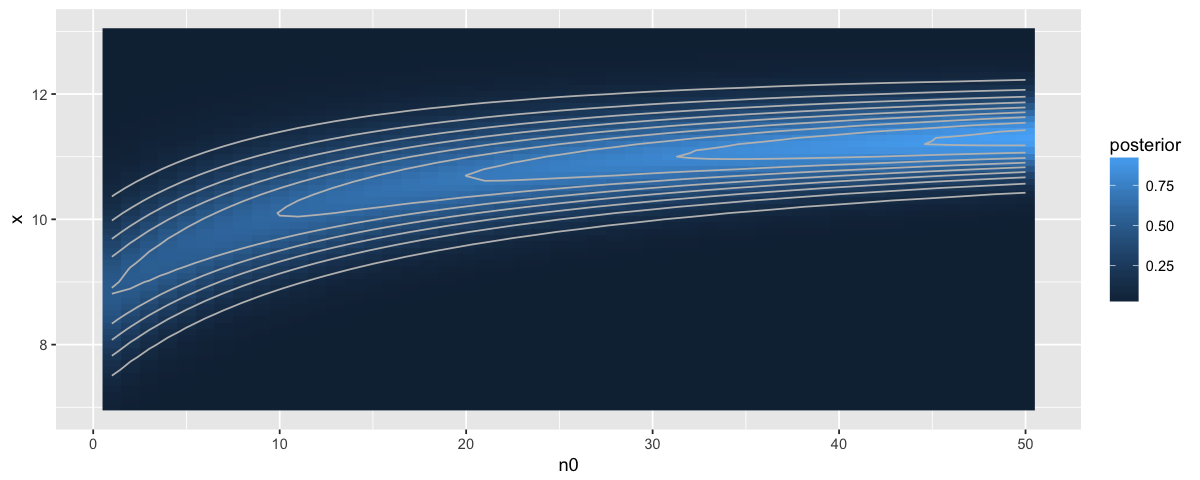

In [6]:
options(repr.plot.width=10, repr.plot.height=4)
library(ggplot2)
library(dplyr)

data <- expand.grid(x=seq(from=7, to=13, by=0.1), n0=1:50) %>%
    mutate(posterior = dgamma(x, sum(y_B) + 12*n0, rate=n0 + length(y_B)))

ggplot(data, aes(x=n0, y=x, z=posterior)) +
    geom_raster(aes(fill = posterior)) +
    geom_contour(colour = "gray")

##### Problem C
> c) Should knowledge about population $A$ tell us anything about population $B$? Discuss whether or not it makes sense to have $p(\theta_A, \theta_B) = p(\theta_A)\cdot p(\theta_B)$.

##### Solution

If $p(\theta_A)$ and $p(\theta_B)$ are independent then $p(\theta_A | \theta_B) = p(\theta_A)$ and hence:

$$
\begin{align}
p(\theta_A, \theta_B) &= p(\theta_A | \theta_B) \cdot p(\theta_B)\\
                      &= p(\theta_A)\cdot p(\theta_B)
\end{align}
$$

If random variables are independent then knowledge about one variable does not tell us anything about another variable.

# Exercise 4.2

> Tumor count comparisons: Reconsider the tumor count data in Exercise 3.3:

##### Problem A

> a) For the prior distribution given in part a) of that exercise, obtain $p(\theta_B < \theta_A|y_A, y_B)$ via Monte Carlo sampling.

##### Solution

In [7]:
sample_size <- 5000
mean(
    rgamma(sample_size, shape = a_B + sum(y_B), rate = b_B + length(y_B)) <
    rgamma(sample_size, shape = a_A + sum(y_A), rate = b_A + length(y_A)))

[1] 0.9952

##### Problem B

> b) For a range of values of $n_0$, obtain $p(\theta_B < \theta_A|y_A, y_B)$ for $\theta_A \sim gamma(120, 10)$ and $\theta_B \sim gamma(12 \cdot n_0, n_0)$. Describe how sensitive the conclusions about the event $\{\theta_B < \theta_A\}$ are to the prior distribution on $\theta_B$.

##### Solution

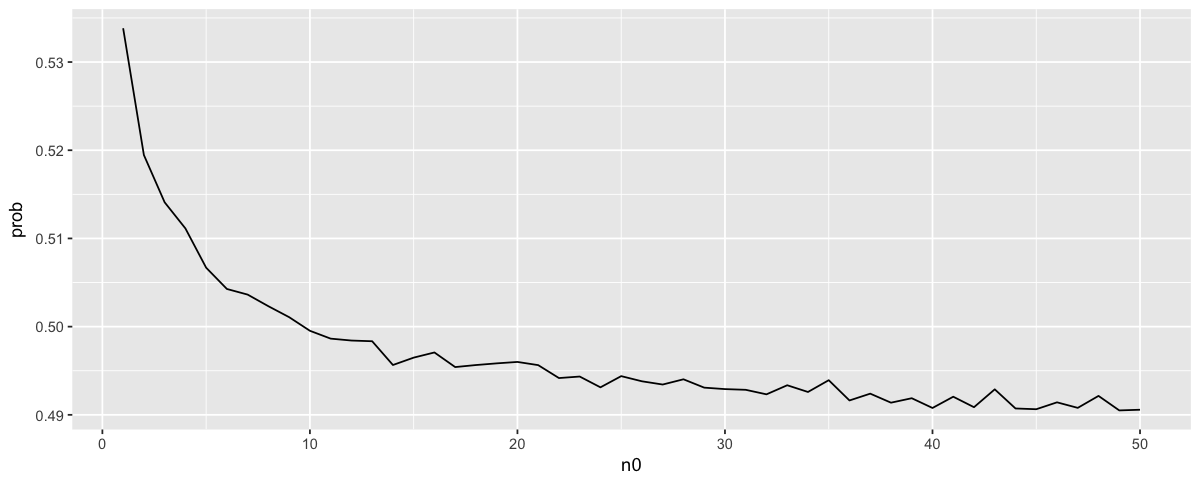

In [8]:
calculate_exp <- function(n) {
    sample_size <- 500000
    mean(rgamma(sample_size, shape = 12*n, rate = n) < rgamma(sample_size, shape = 120, rate = 10))
}
calculate_exp <- Vectorize(calculate_exp)

ggplot(data.frame(n0=1:50, prob=calculate_exp(1:50)), aes(n0)) +
    geom_line(aes(y=prob))

##### Problem C

> c) Repeat parts a) and b), replacing the event $\{\theta_B < \theta_A\}$ with the event $\{Y˜B < Y˜A\}$, where $Y˜A$ and $Y˜B$ are samples from the posterior predictive distribution

##### Solution

Posterior is a Gamma:

$$
p(\theta|a, b) = \frac{b^a}{\Gamma(a)}\cdot \theta^{a-1} \cdot e^{-b\theta}
$$

Predicted value is a Poisson:

$$
p(y|\theta) = \frac{\theta^y \cdot e^{-\theta}}{y!}
$$

Posterior predictive:

$$
\begin{align}
p(y|a,b) &= \int_{0}^{+\infty}p(y|\theta)p(\theta|a, b)d\theta\\
&= \int_{0}^{+\infty} \frac{\theta^y \cdot e^{-\theta}}{y!} \cdot \frac{b^a}{\Gamma(a)}\cdot \theta^{a-1} \cdot e^{-b\theta} d\theta\\
&= \int_{0}^{+\infty} \frac{b^a}{\Gamma(a)y!} \cdot \theta^{(a+y)-1} \cdot e^{-(b+1)\theta}d\theta\\
&= \frac{b^a}{\Gamma(a)y!} \cdot \int_{0}^{+\infty} \theta^{(a+y)-1} \cdot e^{-(b+1)\theta}d\theta\\
&= \frac{b^a}{\Gamma(a)y!} \cdot \frac{\Gamma(a+y)}{(b + 1)^{a+y}} \cdot \int_{0}^{+\infty} \frac{(b + 1)^{a+y}}{\Gamma(a+y)} \cdot \theta^{(a+y)-1} \cdot e^{-(b+1)\theta}d\theta\\
&= \frac{b^a}{\Gamma(a)y!} \cdot \frac{\Gamma(a+y)}{(b + 1)^{a+y}} \cdot \int_{0}^{+\infty} gamma(\theta|a+y,b+1)d\theta\\
&= \frac{b^a}{\Gamma(a)y!} \cdot \frac{\Gamma(a+y)}{(b + 1)^{a+y}} \cdot 1\\
&= \frac{\Gamma(a+y)}{\Gamma(a)y!} \cdot \frac{b^a}{(b + 1)^{a+y}}\\
&= \frac{(a+y-1)!}{(a-1)!y!} \cdot \frac{b^a}{(b + 1)^a} \cdot \frac{1}{(b + 1)^y}\\
&= \binom{y+a-1}{y} \cdot \bigg(\frac{b}{b+1}\bigg)^a \cdot \bigg(\frac{1}{b+1}\bigg)^y\\
&= nbinom\bigg(y\Big|size=a, prob=\frac{b}{b+1}\bigg)
\end{align}
$$

Keep in mind that parameter 'porb' has different meaning on [wikipedia](https://en.wikipedia.org/wiki/Negative_binomial_distribution) and [R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/NegBinomial.html): $prob_{Wiki} = 1 - prob_R$

[1] 0.6952

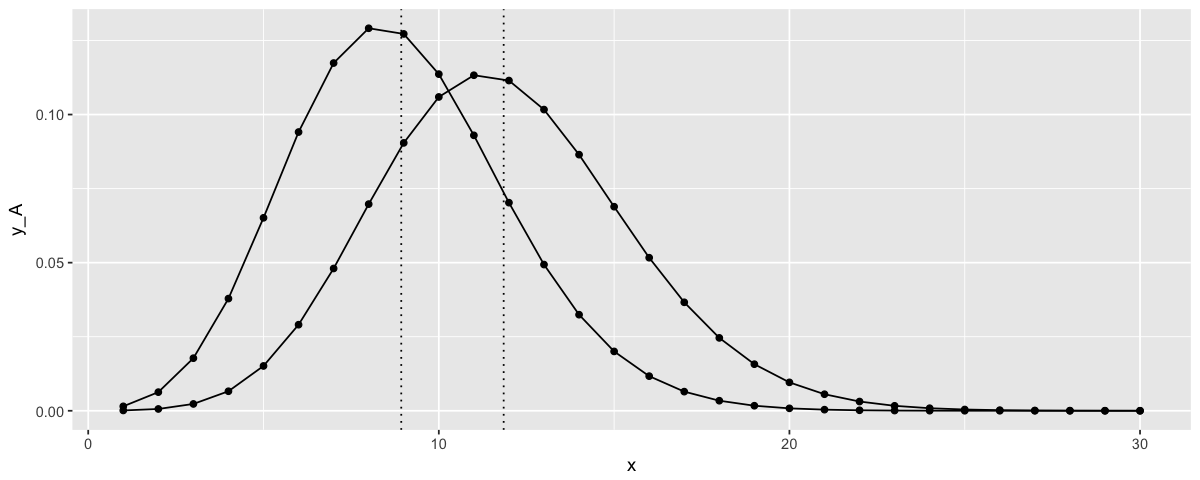

In [78]:
r_A <- a_A + sum(y_A)
r_B <- a_B + sum(y_B)
p_A <- 1 - 1/(b_A + length(y_A) +1)
p_B <- 1 - 1/(b_B + length(y_B) +1)
mu_A <- (1-p_A)*r_A/p_A
mu_B <- (1-p_B)*r_B/p_B

options(repr.plot.width=10, repr.plot.height=4)
data <- data.frame(x=seq(1, 30, 1)) %>%
    mutate(y_B=dnbinom(x, size = r_B, prob = p_B),
           y_A=dnbinom(x, size = r_A, prob = p_A))

ggplot(data, aes(x)) +
    geom_point(aes(y=y_A)) + geom_line(aes(y=y_A)) +
    geom_point(aes(y=y_B)) + geom_line(aes(y=y_B)) +
    geom_vline(xintercept = mu_A, linetype=3) +
    geom_vline(xintercept = mu_B, linetype=3)

sample_size <- 5000
mean(
    rnbinom(sample_size, size = r_B, prob = p_B) <
    rnbinom(sample_size, size = r_A, prob = p_A))

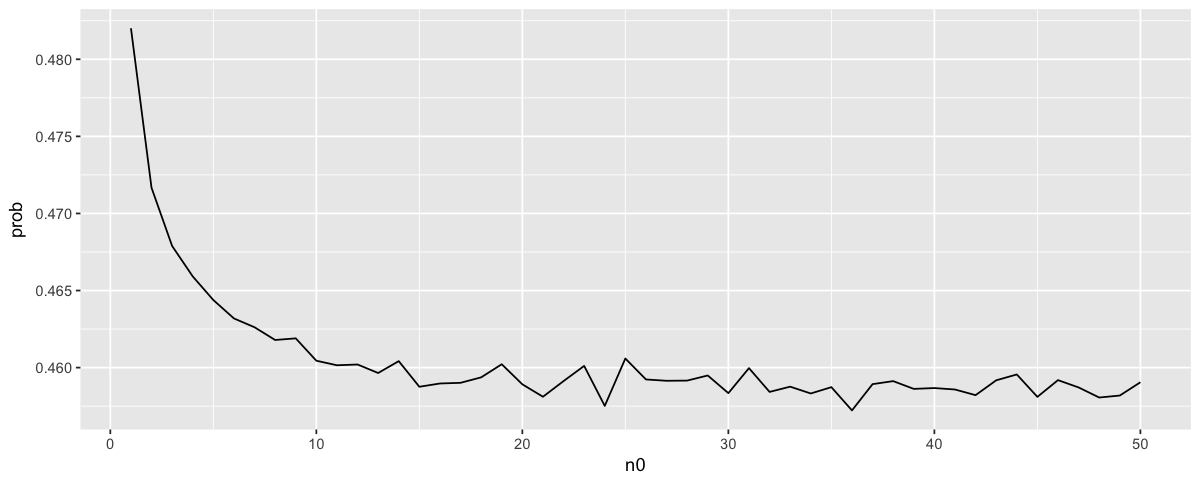

In [82]:
calculate_exp <- function(n) {
    sample_size <- 500000
    mean(rnbinom(sample_size, size = 12*n, prob = n/(n+1)) < rnbinom(sample_size, size = 120, prob = 10/(10+1)))
}
calculate_exp <- Vectorize(calculate_exp)

ggplot(data.frame(n0=1:50, prob=calculate_exp(1:50)), aes(n0)) +
    geom_line(aes(y=prob))